Import Needed Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
linkdin_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linkedin-reviews.csv')
linkdin_data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


The dataset contains two columns: Review and Rating. The Review column consists of textual reviews, and the Rating column contains corresponding numerical ratings.

Let’s have a look at the column information

In [5]:
linkdin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### EDA

Let’s begin with the distribution of ratings.

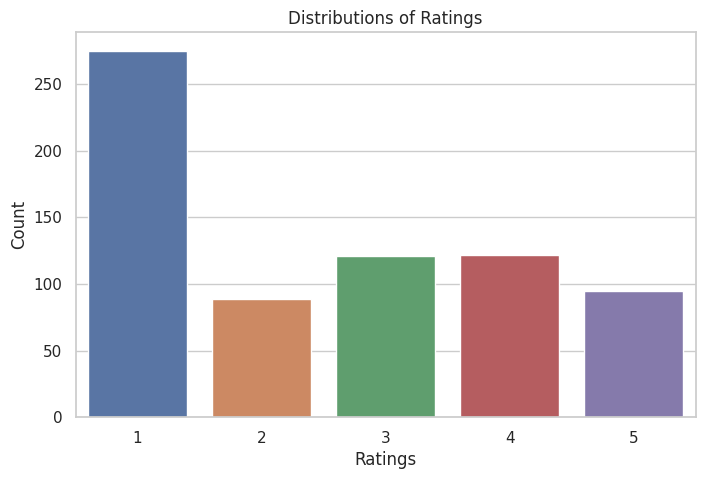

In [7]:
# Ploting distribution of ratings
sns.set(style = 'whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(data = linkdin_data,
              x = 'Rating')
plt.title('Distributions of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Now, we’ll analyze the length of the reviews, as this can sometimes correlate with the sentiment or detail of feedback. We will first calculate the length of each review and then visualize the data.

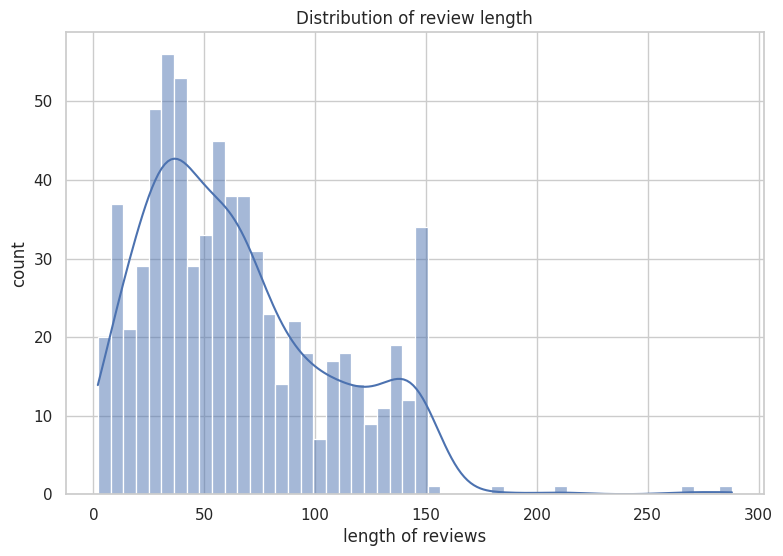

In [8]:
# Calculating length of reviews
linkdin_data['Review length'] = linkdin_data['Review'].apply(len)

# Ploting the Disrtibution of review length
plt.figure(figsize=(9,6))
sns.histplot(linkdin_data['Review length'],bins=50,kde=True)
plt.title('Distribution of review length')
plt.xlabel('length of reviews')
plt.ylabel('count')
plt.show()

### Adding Sentiment Labels in Data

Now, the next step is to label the data with sentiments. We can use Textblob for this task. TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text. We can use this score to classify each review’s sentiment as positive, neutral, or negative.

In [16]:
! pip install -U textblob

Let’s proceed to label the dataset using TextBlob for sentiment analysis

In [18]:
from textblob import TextBlob

def textblob_sentiment_analysis(Reviews):
  # Analyzing the sentiment of review
  sentiment = TextBlob(Reviews).sentiment

  # classifying the based on polarity
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

# Applying TextBlob sentiment analysis on the reviews
linkdin_data['Sentiment'] = linkdin_data['Review'].apply(textblob_sentiment_analysis)

linkdin_data.head()

,Review,Rating,Review length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


Analyzing App Reviews Sentiment

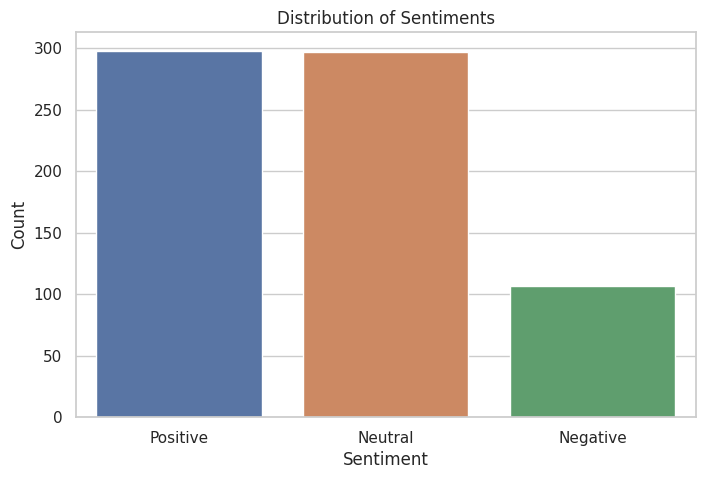

In [19]:
# Analyzing app reviews sentiment
sentiment_distribution = linkdin_data['Sentiment'].value_counts()

# ploting sentiment distribution
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Next, we’ll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and the numerical rating. For this task, we can see how sentiments are distributed across different rating levels.

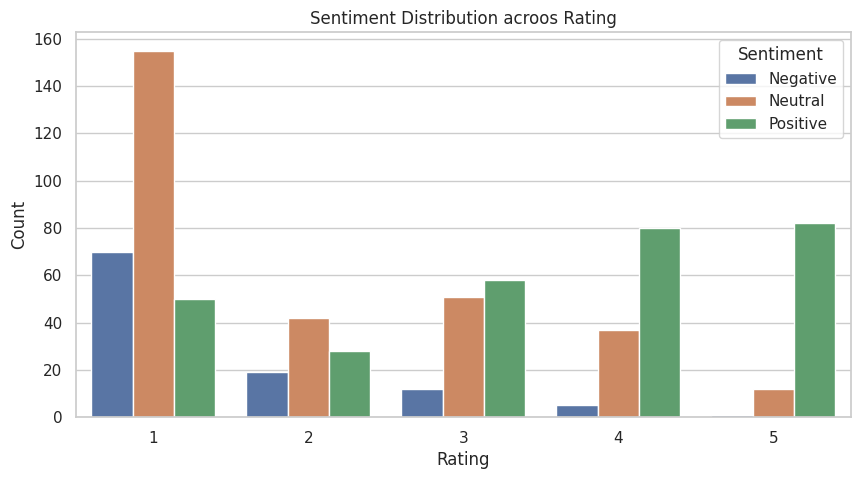

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data = linkdin_data, x = 'Rating', hue = 'Sentiment')
plt.title('Sentiment Distribution acroos Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let’s perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequently occurring words in positive, negative, and neutral reviews using a word cloud.

In [26]:
from wordcloud import WordCloud

# Function to generate the wordcloud for each sentiment
def gen_wordcloud(sentiment):
  text = " ".join(review for review in linkdin_data[linkdin_data['Sentiment'] == sentiment]['Review'])
  wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation = 'bilinear')
  plt.title(f'WordCloud for {sentiment} Reviews')
  plt.axis('off')
  plt.show()

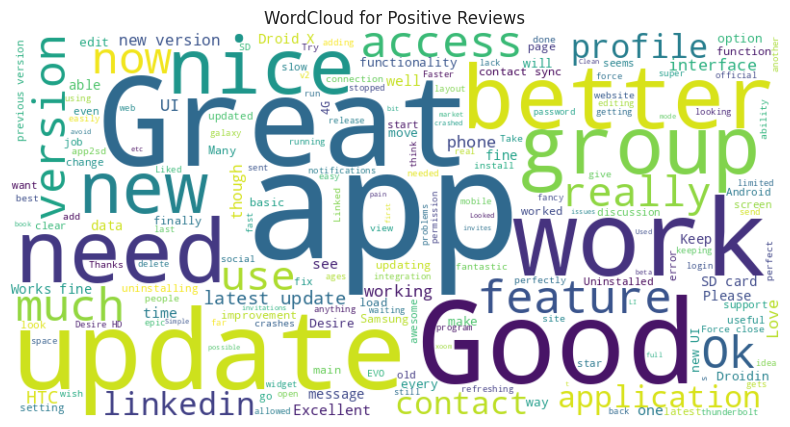

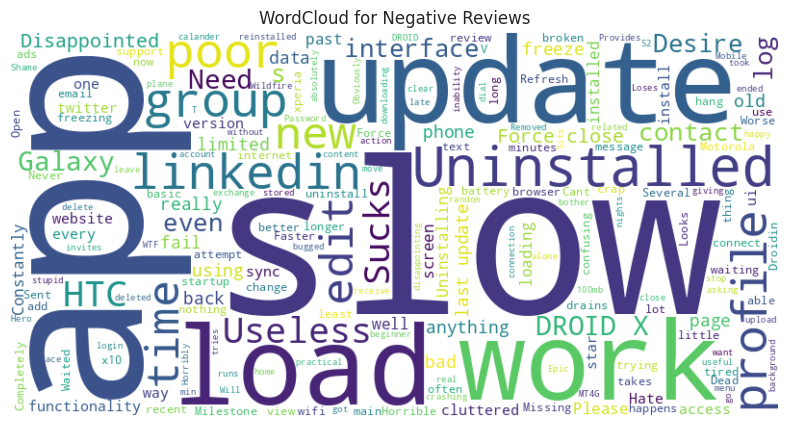

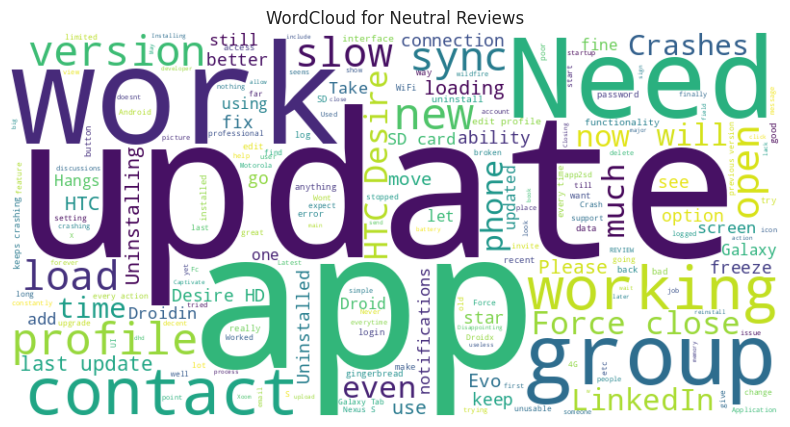

In [27]:
# Generating word clouds for each sentiment
for sentiment in ['Positive','Negative','Neutral']:
  gen_wordcloud(sentiment)

### Summary

So, App Reviews Sentiment Analysis is a valuable tool for app developers and businesses to understand user feedback, prioritize feature updates, and maintain a positive user community. It involves using data analysis techniques to determine whether the sentiments in these reviews are positive, negative, or neutral.